## 1 - SetUp Environment

In [8]:
import numpy as np
import pandas as pd
import pickle

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Load Dataset

we should import thepreprocess, mapped and encoded dataset 

In [ ]:
with open('/content/drive/MyDrive/Python/Regression/Assets/df(3.encoded).pickle', 'rb') as file:
    df = pickle.load(file)

df.head(3)

,Duration,Cost,Team Member,Height,Frequency,Year 2018,Year 2019,Year 2020,Year 2021,Quarter Two,...,Horizontal_Orien,Vertical_Orien,Active-powered,Battery-powered,PoE-powered,Passive-powered,Center_Zone,West_Zone,South_Zone,East_Zone
0,241.0,516773.0,12.0,24.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,608.0,954888.0,22.0,42.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,772.0,932640.0,14.0,43.0,4,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0


## 3 - Install PyCaret

In [9]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from pycaret.regression import *

## 4 - Setup Trainer Model

first we split dataset to train and test.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cost', axis=1), df['Cost'], test_size=0.2, random_state=42)

the we declare numerical and categorical features

In [12]:
#define numerical features
num_features = ['Duration', 'Team Member' , 'Height']

#define categorical features
cat_features = [col for col in X_train.columns if col not in num_features]

in the next step, we setup training environment.

In [13]:
#construct modelling
reg = setup(
    data = X_train,
    target = y_train,

    numeric_features = num_features,
    normalize = True,
    normalize_method = 'robust',

    categorical_features = cat_features,

    pca = True,

    session_id = 42
    )

,Description,Value
0,Session id,42
1,Target,Cost
2,Target type,Regression
3,Original data shape,"(239, 39)"
4,Transformed data shape,"(239, 46)"
5,Transformed train set shape,"(167, 46)"
6,Transformed test set shape,"(72, 46)"
7,Ordinal features,34
8,Numeric features,3
9,Categorical features,35


## 5 - Traning Data

In [14]:
#compare models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,186224.0402,55822091106.0990,233154.1434,0.7853,0.3761,0.3492,1.4150
lr,Linear Regression,191356.6777,58402278127.9696,238698.6007,0.7729,0.3785,0.3450,3.3920
lasso,Lasso Regression,191353.3808,58399319872.9679,238691.9635,0.7729,0.3784,0.3450,1.6880
lar,Least Angle Regression,191356.6777,58402278127.9696,238698.6007,0.7729,0.3785,0.3450,1.1220
llar,Lasso Least Angle Regression,191353.3808,58399319872.9679,238691.9635,0.7729,0.3784,0.3450,1.3240
huber,Huber Regressor,216591.2408,75190857663.8252,268519.7134,0.7381,0.4798,0.5118,1.3180
lightgbm,Light Gradient Boosting Machine,207269.3054,69421958824.6026,260215.3602,0.7372,0.4419,0.4165,1.1500
omp,Orthogonal Matching Pursuit,225737.9106,83434496121.9605,281536.8546,0.6982,0.4589,0.4773,1.3050
gbr,Gradient Boosting Regressor,234355.2382,84663683605.4655,286226.1285,0.6770,0.4770,0.4844,1.6320
et,Extra Trees Regressor,252719.1495,92565137917.8965,299636.1998,0.6609,0.5004,0.5319,1.6620


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Ridge(random_state=42)

## 6 - Analyse the Basic Model

<b><u>RMSE (Mean Squared Error)</u></b> >>>> Accuracy</br></br>
<i> The Root Mean Squared Error measures the average root squared difference between the predicted and actual values. It is calculated by taking the square of the difference between the predicted and actual values for each data point, and then taking the mean of these root squared differences. A smaller value of RMSE indicates better performance, as it means the model's predictions are closer to the actual values on average. In the table, the model with the lowest RMSE (233,154) indicates the model's predictions are off by around 233,154 dollars root squared from the future actual values. </i>

<b><u>R2 (R-squared)</u></b> >>>> Fit </br></br>
<i> The coefficient of determination, or R-squared, measures the proportion of variance in the target variable that can be explained by the independent variables in the model. An R-squared value of 1 indicates a perfect fit, meaning all the variance in the target variable is explained by the independent variables in the model. On the other hand, an R-squared value of 0 indicates that the model does not explain any of the variance in the target variable. In the table , the model with the highest R-squared (0.7853) indicates that around 78.53% of the variance in the target variable can be explained by the independent variables in the model. </i>



---



for company it's curcial that R2 must be more than 77%. However, about accuracy it's improtant that error must not be more than 220,000 dollars. 

## 7 - Ensemble Model

according to company's expectations, we can combine some top models.

1.   Ridge Regression (ridge)
2.   Linear Regression (lr)
3.   Lasso Regression (lasso)
4.   Least Angle Regression (lar)
5.   Lasso Least Angle Regression (llar)

In [15]:
ridge = create_model('ridge', verbose=False)
lr = create_model('lr', verbose=False)
lasso = create_model('lasso', verbose=False)
lar = create_model('lar', verbose=False)
llar = create_model('llar', verbose=False)

### 7.1 - Ensembel Five

In [16]:
Ensemble_5 = blend_models(estimator_list = [ridge, lr, lasso, lar, llar])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,262064.2729,89589467396.1732,299314.9969,0.7647,0.5965,0.6747
1,172098.8326,44695281280.9204,211412.5854,0.8474,0.3693,0.3035
2,224460.9897,79085419368.7465,281221.2996,0.4136,0.2707,0.1992
3,164466.4489,51020014643.0294,225876.1046,0.8654,0.5763,0.5924
4,211068.5121,64592508148.0716,254150.5620,0.8276,0.5239,0.5228
5,202278.1187,58156078356.5688,241155.7139,0.8364,0.4267,0.4108
6,189605.4810,51600712215.3973,227157.9015,0.7761,0.2573,0.1767
7,188390.2124,61528186659.9189,248048.7586,0.7301,0.2066,0.1671
8,164282.4100,54157597658.5518,232717.8499,0.7848,0.4094,0.3090


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 7.2 - Ensembel Four

In [17]:
Ensemble_4 = blend_models(estimator_list = [ridge, lr, lasso, lar])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,262056.4382,89602796284.4386,299337.2618,0.7647,0.5969,0.6754
1,171630.2190,44549810382.3802,211068.2600,0.8479,0.3688,0.3031
2,223693.3792,78674576426.2216,280489.8865,0.4167,0.2692,0.1982
3,164766.6614,51101181031.4626,226055.7034,0.8652,0.5766,0.5932
4,210224.6327,64216742606.6187,253410.2259,0.8286,0.5242,0.5230
5,202184.3875,58154602790.8864,241152.6545,0.8364,0.4267,0.4107
6,189272.9969,51333343833.5626,226568.6294,0.7772,0.2562,0.1765
7,188227.1540,61330790995.4130,247650.5421,0.7310,0.2066,0.1678
8,164377.7033,54121938158.5543,232641.2220,0.7849,0.4100,0.3105


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 7.3 - Ensembel Three

In [18]:
Ensemble_3 = blend_models(estimator_list = [ridge, lr, lasso])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,262045.0470,89629526643.4131,299381.9077,0.7646,0.5976,0.6765
1,170848.1921,44313134061.3013,210506.8504,0.8487,0.3681,0.3024
2,222411.4637,78003771797.9817,279291.5534,0.4217,0.2668,0.1966
3,165269.3235,51239805433.0399,226362.1113,0.8648,0.5770,0.5945
4,208813.1894,63603385916.3031,252197.1172,0.8303,0.5248,0.5233
5,202027.9723,58154282302.1375,241151.9900,0.8364,0.4267,0.4105
6,188719.2642,50893918260.8574,225596.8046,0.7791,0.2543,0.1761
7,187952.1770,61006138483.3524,246994.2074,0.7324,0.2068,0.1689
8,164539.7338,54073159071.6314,232536.3608,0.7851,0.4111,0.3129


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 7.4 - Ensembel Two

In [19]:
Ensemble_2 = blend_models(estimator_list = [ridge, lr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,262019.7648,89694952934.5847,299491.1567,0.7644,0.5990,0.6788
1,169285.6448,43864322849.8780,209438.1122,0.8503,0.3667,0.3010
2,219851.4797,76719943916.3350,276983.6528,0.4312,0.2621,0.1933
3,166271.1859,51532940873.5348,227008.6802,0.8640,0.5779,0.5973
4,205997.7693,62439091183.6205,249878.1527,0.8334,0.5260,0.5238
5,202311.5405,58160961794.9639,241165.8388,0.8364,0.4266,0.4107
6,187611.1875,50041877062.8258,223700.4181,0.7828,0.2506,0.1754
7,187407.0426,60383012097.6027,245729.5507,0.7351,0.2076,0.1712
8,164858.9822,54020228700.3358,232422.5219,0.7853,0.4134,0.3179


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 7.5 - Ensembel Summary

In [20]:
Model = ['ridge', 
         'ridge + lr + lasso + lar + llar', 
         'ridge + lr + lasso + lar', 
         'ridge + lr + lasso', 
         'ridge + lr']

RMSE = ['233154.1434', '237365.0456', '237050.1275', '236538.4703', '235575.5967']
R2 = [0.7853, 0.7759, 0.7766, 0.7777, 0.7798]

# Create dataframe
Ensembel_summary = pd.DataFrame({'Ensembel Model': Model, 'RMSE': RMSE, 'R2': R2})
Ensembel_summary

,Ensembel Model,RMSE,R2
0,ridge,233154.1434,0.7853
1,ridge + lr + lasso + lar + llar,237365.0456,0.7759
2,ridge + lr + lasso + lar,237050.1275,0.7766
3,ridge + lr + lasso,236538.4703,0.7777
4,ridge + lr,235575.5967,0.7798


the result shows, the best model is ridge.

## 8 - Tuned Model

Now we can hyper tune and optimze the ridge model for having better accuracy and fitness.



In [21]:
tunned = tune_model(ridge , optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,272526.4225,99934330381.5374,316123.9162,0.7375,0.6393,0.7487
1,162124.3199,40173981173.1022,200434.4810,0.8629,0.3727,0.3113
2,198752.3546,62353253102.0928,249706.3337,0.5377,0.2207,0.1780
3,184082.7996,59047210222.6434,242996.3173,0.8442,0.5914,0.6339
4,182072.5299,53527689007.2056,231360.5174,0.8572,0.5579,0.5656
5,213836.1806,61581808652.6676,248156.8227,0.8267,0.4520,0.4475
6,173937.4723,40316555454.5344,200789.8291,0.8250,0.2286,0.1764
7,172498.8114,47992621804.0067,219072.1840,0.7895,0.2641,0.2108
8,183349.3199,56413296982.0463,237514.8353,0.7758,0.4610,0.4175


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


*    The RMSE was <b>233,154</b> and now it is <b>229,225</b>
*    The R2 was <b>78.53%</b> and now it is <b>79.76%</b>

## 9 - Interpret the Result

Finally, we can analyse the model and importance of features.

In [22]:
#find intercept (bias)
intercept = tunned.intercept_

#find coefficient (wieghts)
coefficients = tunned.coef_

#create a datafram summary
feature_names = X_train.columns.tolist()
coefs_dict = dict(zip(feature_names, coefficients))

reg_summary = pd.DataFrame.from_dict(coefs_dict, orient='index', columns=['Coefficients'])
reg_summary.loc['Intercept'] = intercept
reg_summary

,Coefficients
Duration,-1.387392e+04
Team Member,6.544887e+05
Height,1.955117e+05
Frequency,-1.283304e+05
Year 2018,-1.612793e+04
Year 2019,-1.197546e+05
Year 2020,4.005004e+04
Year 2021,-6.043496e+04
Quarter Two,-1.009496e+04
Quarter Three,-7.629768e+04


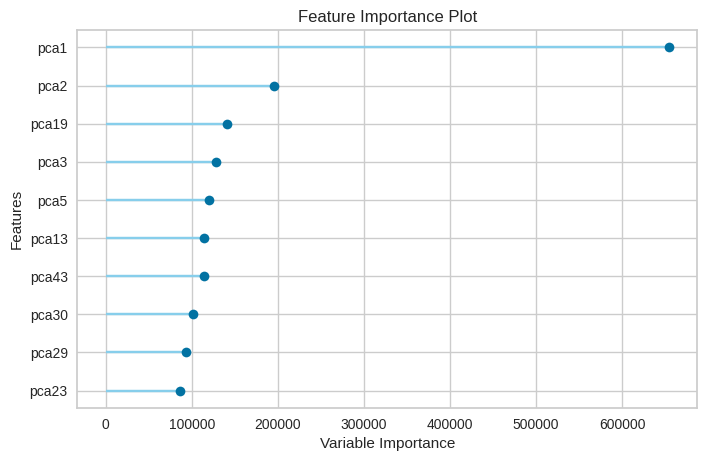

In [23]:
plot_model(tunned, plot='feature')

<b>Numerical</b>
<li>Duration: if duration increase 1 day, the cost of project, decrease by -13,873 dollars.</br></br>
<li>Team Member: if the number of team member increase 1 person, the cost of project, increases by 654,488 dollars.</br></br>
<li>Height: if the height of antenna increase 1 meter, the cost of project, increases by 195,511 dollars.</br></br>
<li>Frequency: if the Frequency of antenna increase 1 level (ordinal), the cost of project, decreases by 128,330 dollars.


---

<b>Dummy</b>
<li>Year: if project begins in year 2018, 2019 and 2021, it costs less than year 2017 (benchmark). Also, if project begins in year 2020, it costs more than year 2017. </br></br>
<li>Quarter (month): if project begins in quarter two and three in year, it costs less than quarter one (benchmark). Also, if project begins in the quarter four, it costs more than quarter one. </br></br>
<li>Weekday: if project begins in Friday and Saturday, it costs less than Monday (benchmark). Also, if project begins in Tuesday, Wednesday, Thursday and Sundat, it costs more than Monday. </br></br>
<li>Signal: if Signal Strenght of Antenna is 1 and 5, it costs less than Signal 0 (benchmark). Also, if Signal Strenght of Antenna is 2, 3 and 4, it costs more than Signal 0. </br></br>
<li>Antenna Type: if Antenna Type is Wire, it costs less than type Dielectric (benchmark). Also, if Antenna Type is PCB, Aperture, Reflector and Array, it costs more than type Dielectric. </br></br>
<li>Orientation: if Antenna orientation is Circular, it costs less than type Omni-directional (benchmark). Also, if Antenna orientation is Horizontal and Vertical, it costs more than Omni-directional. </br></br>
<li>Power Supply: if Power Supply is Active, Battery and PoE, it costs less than type Solar (benchmark). Also, if Power Supply is Passive, it costs more than Solar. </br></br>
<li>Zone: if Zone is Center, West and East, it costs less than type North (benchmark). Also, if Zone is South, it costs more than North. 

## 10 - Testing Data

Now we should run the tunned model on the test dataset to see whether we have overfitting, underfitting or model works properly.

In [24]:
test_model = predict_model(tunned, data = X_test, verbose = False)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

R2_test = r2_score(y_test, test_model['prediction_label'])
RMSE_test = mean_squared_error(y_test, test_model['prediction_label'], squared=False)

print('R2 Test is:', round(R2_test, 4))
print('RMSE Test is:', round(RMSE_test, 4))

R2 Test is: 0.8773
RMSE Test is: 191433.2055


now we can see the result and compare manually.

In [26]:
pd.options.display.float_format = '{:.2f}'.format

a = pd.DataFrame(y_test)
b = pd.DataFrame(test_model['prediction_label'])

comparison_table = pd.concat([a,b] , axis = 1)

In [28]:
test_model.head(5)

,Duration,Team Member,Height,Frequency,Year 2018,Year 2019,Year 2020,Year 2021,Quarter Two,Quarter Three,...,Vertical_Orien,Active-powered,Battery-powered,PoE-powered,Passive-powered,Center_Zone,West_Zone,South_Zone,East_Zone,prediction_label
281,836.00,12.00,36.00,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1210692.50
265,113.00,26.00,48.00,4,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,348300.07
164,267.00,23.00,39.00,6,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,628917.86
9,462.00,10.00,21.00,5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,808163.69
77,401.00,13.00,39.00,7,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,977867.20


we can improve model with using much more data, features selection or using data transformation method(logarithm or etc)